In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_excel("rainfall.xlsx")

In [3]:
data

,DATE,radiation,max_temperature,min_temperature,rain
0,1959-01-04,2.000000,10.925000,3.200000,6.575000
1,1959-01-11,2.042857,9.914286,4.271429,1.100000
2,1959-01-18,2.385714,8.371429,4.085714,1.385714
3,1959-01-25,2.771429,6.271429,0.742857,0.628571
4,1959-02-01,2.528571,8.800000,3.085714,3.042857
...,...,...,...,...,...
2135,1999-12-05,2.428571,9.714286,2.800000,1.085714
2136,1999-12-12,1.614286,9.500000,4.114286,3.157143
2137,1999-12-19,2.157143,4.828571,-0.242857,1.671429
2138,1999-12-26,1.757143,7.471429,0.728571,6.971429


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             2140 non-null   datetime64[ns]
 1   radiation        2140 non-null   float64       
 2   max_temperature  2140 non-null   float64       
 3   min_temperature  2140 non-null   float64       
 4   rain             2140 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 83.7 KB


In [5]:
data

,DATE,radiation,max_temperature,min_temperature,rain
0,1959-01-04,2.000000,10.925000,3.200000,6.575000
1,1959-01-11,2.042857,9.914286,4.271429,1.100000
2,1959-01-18,2.385714,8.371429,4.085714,1.385714
3,1959-01-25,2.771429,6.271429,0.742857,0.628571
4,1959-02-01,2.528571,8.800000,3.085714,3.042857
...,...,...,...,...,...
2135,1999-12-05,2.428571,9.714286,2.800000,1.085714
2136,1999-12-12,1.614286,9.500000,4.114286,3.157143
2137,1999-12-19,2.157143,4.828571,-0.242857,1.671429
2138,1999-12-26,1.757143,7.471429,0.728571,6.971429


Separate the year 

data["YEAR"]= data["DATE"].dt.year
data

data["MONTH"]= data["DATE"].dt.month
data

data=data.drop(columns="DATE")
data

data.groupby(by=["YEAR","MONTH"]).mean()

In [6]:
data=data.set_index("DATE")
data

,radiation,max_temperature,min_temperature,rain
DATE,,,,
1959-01-04,2.000000,10.925000,3.200000,6.575000
1959-01-11,2.042857,9.914286,4.271429,1.100000
1959-01-18,2.385714,8.371429,4.085714,1.385714
1959-01-25,2.771429,6.271429,0.742857,0.628571
1959-02-01,2.528571,8.800000,3.085714,3.042857
...,...,...,...,...
1999-12-05,2.428571,9.714286,2.800000,1.085714
1999-12-12,1.614286,9.500000,4.114286,3.157143
1999-12-19,2.157143,4.828571,-0.242857,1.671429


EDA

In [7]:
monthly_df= data.resample("M").mean()
monthly_df


,radiation,max_temperature,min_temperature,rain
DATE,,,,
1959-01-31,2.300000,8.870536,3.075000,2.422321
1959-02-28,4.507143,4.050000,-0.710714,1.871429
1959-03-31,7.102857,9.097143,1.982857,1.428571
1959-04-30,11.396429,10.271429,2.260714,3.760714
1959-05-31,14.034286,14.011429,6.148571,3.182857
...,...,...,...,...
1999-09-30,11.507143,20.664286,11.803571,1.950000
1999-10-31,7.345714,14.414286,7.557143,1.782857
1999-11-30,3.414286,9.878571,4.928571,1.125000


Text(0.5, 0, 'DATE')

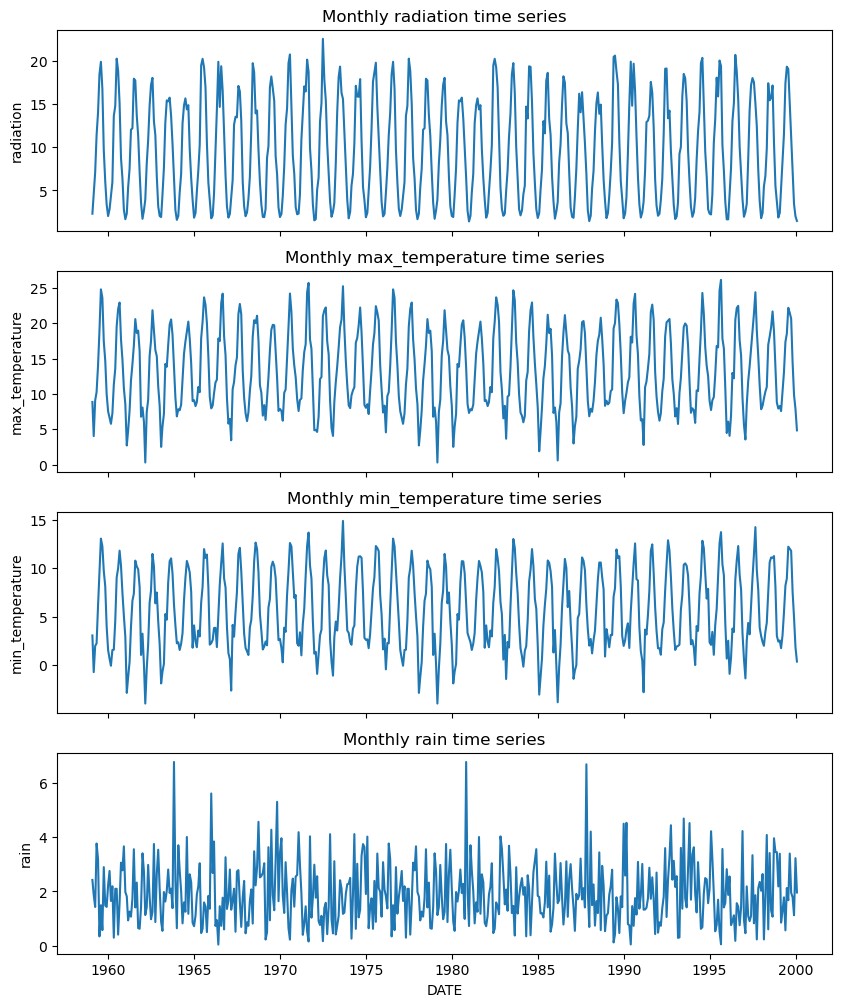

In [9]:
fig,axs=plt.subplots(4,1,figsize=(10,12),sharex=True)  #4row,1column

for i, columns in enumerate(monthly_df.columns):
    axs[i].plot(monthly_df.index,monthly_df[columns],label=columns)
    axs[i].set_title(f"Monthly {columns} time series")
    axs[i].set_ylabel(columns)
    
plt.xlabel("DATE")